## Course: CS 495/595 Data Science with Python

### Take Home Examination
### Due Date: 4/9/2019

### Exercise 1:  Generate fake data  using linear regression model with known parameters and some noise as shown below.
<ul>
<li> Plot the histogram of the fake data.  Use mlab.normpdf to add best-fit pdf. Also, make a scatter plot beween x_1 and y. 
<li> Build a regression model from scratch and demonstrate that it recovers the true values of $\beta$s. Repeat the exercise with Scikit Package.
<li>Create a new variable, Z, that is equal to x_1^2. Include this as one of the predictors in your model. See what happens when you fit a model that depends on x_1 only and then also on Z. For this exercise you will evaluate the model for different sample sizes starting from  100 to 5000 with an increment of 100 samples. You will split your samples into training and test set (80%/20%) using  "train_test_split" function available in the Scikit package. Plot the mean square error of the training set and of the test set versus sample sizes for both models (one with x_1 only and the other that includes Z). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import numpy as np
# Simulate a fake normal distribution values with given mean and standard deviation.
mean, stdDev = 5, 7
# number of samples to generate
N = 1000
x_1 = np.random.normal(mean, stdDev, N)
# generate normal noise with mean as 0 and standard deviation of $2$
trueError = np.random.normal(0, 2, N)
# beta parameters used for generating the data
trueBeta0 = 1.1 
trueBeta1 = -8.2 
# generate data 
y = trueBeta0 + trueBeta1 * x_1 + trueError

In [3]:
np.shape(y)

(1000,)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


Text(0.5, 1.0, 'Histogram of the generated fake data')

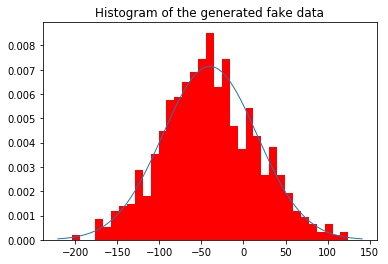

In [4]:
plt.hist(y, bins = 35, normed = True, color = 'red')


# add a 'best fit' line
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,1000)
mu=np.mean(y)
sigma = np.std(y)
p = mlab.normpdf(x, mu, sigma)
#p = norm.pdf(x,mu,sigma)

plt.plot(x,p, linewidth =1)

title = "Histogram of the generated fake data" 
plt.title(title)

Text(0.5, 1.0, 'Scatter plot between x_1 and y')

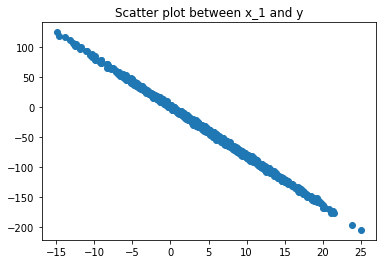

In [5]:
plt.scatter(x_1,y)
plt.title('Scatter plot between x_1 and y')

In [6]:
#linear regression from scratch
xt=np.array(x_1)
yt=np.array(y)
Xt = np.vstack((np.ones(1000), xt))
X = Xt.T
y = yt.T
print (np.shape(X), np.shape(y))
print(X)
XtX = np.dot(X.T, X)
print(XtX)
XtX_inv = np.linalg.inv(XtX)

(1000, 2) (1000,)
[[ 1.          8.64998113]
 [ 1.          4.81835867]
 [ 1.         16.85338498]
 ...
 [ 1.         -9.41256557]
 [ 1.          3.32984202]
 [ 1.          7.24516509]]
[[ 1000.          4979.4876702 ]
 [ 4979.4876702  71049.17050614]]


In [7]:
Xty = np.dot(X.T, y)
b=np.dot(XtX_inv,Xty)#calculating the value of Beta for linear regression using mathematical formula.

In [8]:
np.shape(b)

(2,)

In [9]:
print('min value of x_1' , min(x_1)) 

min value of x_1 -14.899404693121806


In [10]:
print('max value of x_1', max(x_1))# to plot the linear curve identifyuing the min and max values  of the xt array.

max value of x_1 25.014440215929618


In [11]:
b# Beta values obtained.


array([ 1.02535292, -8.21380394])

In [12]:
y3 =  b[0] + b[1]*-20
y10 = b[0] + b[1]*30

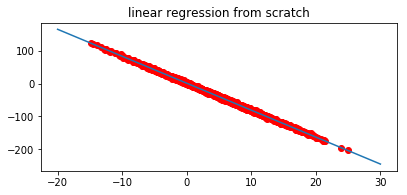

In [13]:
plt.figure(figsize=(14, 6))
plt.subplot(221)
plt.plot(x_1, y, 'ro')
plt.title('linear regression from scratch')
plt.plot([-20, 30], [y3, y10])

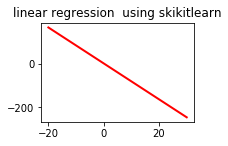

In [14]:
#Linear Regression using skikitlearn

xt=np.array(x_1)
yt=np.array(y)
X = xt[:, np.newaxis] # another way to convert row to col vector
X
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.subplot(222)
x_plot = np.linspace(-20, 30, 10)
X_plot = x_plot[:, np.newaxis]
y_plot = regr.predict(X_plot)
plt.plot(x_plot, y_plot, color='red',linewidth=2)

plt.title('linear regression  using skikitlearn')

plt.show()

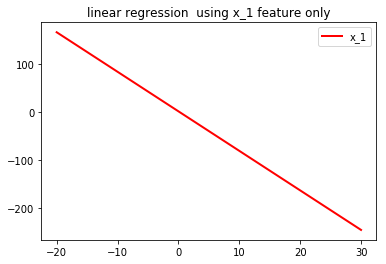

In [15]:
xt=np.array(x_1)
yt=np.array(y)
X = xt[:, np.newaxis] # another way to convert row to col vector
X
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_plot, y_plot, color='red',linewidth=2,label='x_1')

plt.title('linear regression  using x_1 feature only')
plt.legend(loc='best')

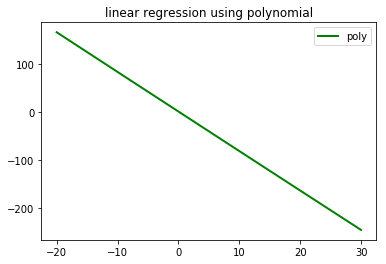

In [16]:
from sklearn.preprocessing import PolynomialFeatures
Z=PolynomialFeatures(2)
zp=Z.fit_transform(X)
z_plot = np.linspace(-20,30,10)
Z_plot = z_plot[:, np.newaxis]
ZP_plot = Z.fit_transform(X_plot)
regrz = linear_model.LinearRegression()
regrz.fit(zp, y)
y_plot = regrz.predict(ZP_plot)
plt.title('linear regression using polynomial')
plt.plot(z_plot, y_plot, color='green', linewidth=2,label="poly")

plt.legend(loc='best')

# both the curves are almost similar  so we can  say that adding polynomial feature is not causing any change to linear regression .lets identify the prediction for both

In [17]:
# polynomial regression implemented from scratch .
xt=np.array(x_1)
z = xt*xt
yt=np.array(y)
m = len(xt)
X = np.array([np.ones(m), xt, z]).T
y = yt.T



In [18]:
XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)
betaHat = np.linalg.solve(XtX, Xty)
print(betaHat)

[ 1.00735846e+00 -8.22048753e+00  7.21687359e-04]


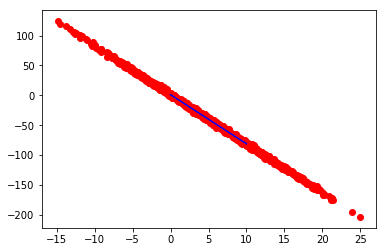

In [19]:
plt.figure(1)
xx = np.linspace(0, 10, 100)
xx2 = xx * xx
yy = np.array(betaHat[0] + betaHat[1] * xx + betaHat[2] * xx2)
plt.plot(xx, yy.T, color='b')
plt.scatter(xt, yt, color='r')
plt.show()

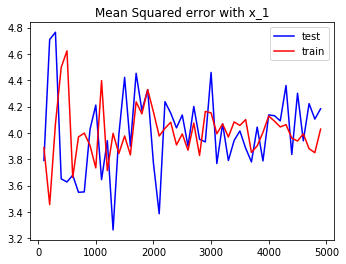

In [20]:
from sklearn.metrics import mean_squared_error
sampledata=[]
errorx=[]
errorX_train=[]
mean,stdDev=5,7
for  i in range(100,5000,100):
    sampledata.append(i)
    x_1 = np.random.normal(mean, stdDev, i)
    trueError = np.random.normal(0, 2, i)
    trueBeta0 = 1.1 
    trueBeta1 = -8.2
    y = trueBeta0 + trueBeta1 * x_1 + trueError
    X = x_1[:, np.newaxis] # another way to convert row to col vector
    Y = y[:, np.newaxis]
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=45)
    y_predX = regr.predict(X_test)
    y_predX_train=regr.predict(X_train)
    errorx.append(mean_squared_error(y_test, y_predX))
    errorX_train.append(mean_squared_error(y_predX_train, y_train))
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Mean Squared error with x_1')
plt.plot(sampledata, errorx,color='blue',label='test')
plt.plot(sampledata, errorX_train,color='red',label='train')
plt.legend(loc='best')



  


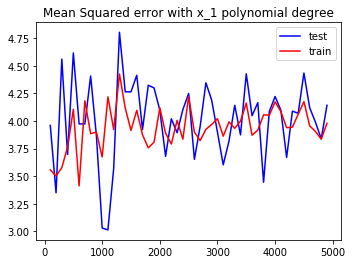

In [21]:
errorZ_test=[]
errorZ_train=[]
sampledata=[]
for  i in range(100,5000,100):
    sampledata.append(i)
    x_1 = np.random.normal(mean, stdDev, i)
    trueError = np.random.normal(0, 2, i)
    trueBeta0 = 1.1 
    trueBeta1 = -8.2
    y = trueBeta0 + trueBeta1 * x_1 + trueError
    X = x_1[:, np.newaxis] # another way to convert row to col vector
    Y = y[:, np.newaxis]
    XPZ = Z.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
    XPZ, Y, test_size=0.20, random_state=45)
    degree = 2
    poly = PolynomialFeatures(degree)
    regrz.fit(X_train, y_train)
    y_predZ = regrz.predict(X_test)
    y_predztrain=regrz.predict(X_train)
    errorZ_test.append(mean_squared_error(y_test, y_predZ))
    errorZ_train.append((mean_squared_error(y_predztrain, y_train)))
plt.figure(figsize=(12, 4))
plt.subplot(122)
plt.title('Mean Squared error with x_1 polynomial degree')
plt.plot(sampledata, errorZ_test,color='blue',label='test')
plt.plot(sampledata, errorZ_train,color='red',label='train')
plt.legend(loc='best')





    
    
    

    
         

In [22]:
# by observing the plots of both mean squared error and linear regression plots there is no difference by adding the polynomial regression 

### Exercise 2: Use real estate sale data. Dataset will be available along with this file on the blackboard.
<ul>
<li>Analyze sales using regression with any predictors you feel are relevant. Justify why regression was appropriate to use.
<li>Visualize the coefficients and fitted model.
<li>Predict the neighborhood using a k-NN classifier. Be sure to withhold a subset of the data for testing. Find the variables and the k that give you the lowest prediction error.
<li>Report and visualize your findings.
<li>Describe any decisions that could be made or actions that could be taken from this analysis.
</ul>

In [23]:
data=pd.read_csv('nyc-rolling-sales (1).csv')
data.head()
data= data.replace(r'\s+', 0, regex=True)# to eliminate the '-' values in the given data.
# converting to numerical columns to find the corerlation with salesprice
data['SALE PRICE']=data['SALE PRICE'].astype(float)
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].astype(float)
data['TOTAL UNITS']=data['TOTAL UNITS'].astype(float)
data['RESIDENTIAL UNITS']=data['RESIDENTIAL UNITS'].astype(float)
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].astype(float)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,0,0,2A,392,6,0,C2,0,...,5.0,0,5.0,1633.0,6440.0,1900,2,C2,6625000.0,0
1,5,1,0,0,2,399,26,0,C7,0,...,28.0,3,31.0,4616.0,18690.0,1900,2,C7,0.0,0
2,6,1,0,0,2,399,39,0,C7,0,...,16.0,1,17.0,2212.0,7803.0,1900,2,C7,0.0,0
3,7,1,0,0,2B,402,21,0,C4,0,...,10.0,0,10.0,2272.0,6794.0,1913,2,C4,3936272.0,0
4,8,1,0,0,2A,404,55,0,C2,0,...,6.0,0,6.0,2369.0,4615.0,1900,2,C2,8000000.0,0


In [24]:
data.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY             int64
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                           int64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                    int64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                           int64
dtype: object

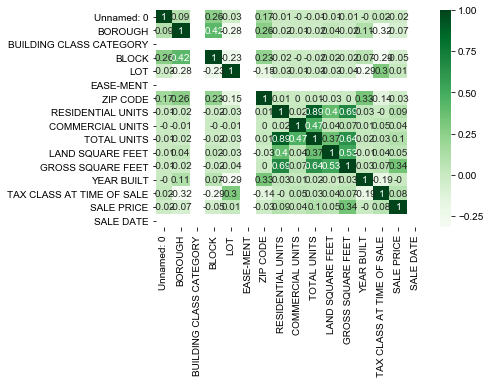

In [25]:
sns.heatmap(data.corr().round(2), cmap='Greens', annot=True)
sns.set(rc={'figure.figsize':(45,12)})
plt.show()

In [36]:
#observing the heatmap we can see that  gross square feet is having high correlation to the salesprice.This is obtained after converting to numerical values.
#lets try predicting the saleprice using gross square feet alone.

In [26]:
data.columns


Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [27]:
data.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY             int64
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                           int64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                    int64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                           int64
dtype: object

In [28]:
X=data[['GROSS SQUARE FEET']]
X

,GROSS SQUARE FEET
0,6440.0
1,18690.0
2,7803.0
3,6794.0
4,4615.0
5,9730.0
6,4226.0
7,21007.0
8,9198.0
9,18523.0


In [29]:
Y=data['SALE PRICE']
Y

0         6625000.0
1               0.0
2               0.0
3         3936272.0
4         8000000.0
5               0.0
6         3192840.0
7               0.0
8               0.0
9        16232000.0
10              0.0
11       10350000.0
12              1.0
13         499000.0
14             10.0
15         529500.0
16         423000.0
17         501000.0
18         450000.0
19         510000.0
20              0.0
21         350000.0
22       11900000.0
23       11900000.0
24         350000.0
25         404000.0
26         535000.0
27        1400000.0
28         866000.0
29         355000.0
            ...    
84518      875000.0
84519      875000.0
84520      840000.0
84521      772500.0
84522      740000.0
84523           0.0
84524           0.0
84525           0.0
84526      590000.0
84527      580000.0
84528      550000.0
84529      545000.0
84530      800000.0
84531      642500.0
84532      408092.0
84533      600000.0
84534      610000.0
84535      645000.0
84536      168000.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)
reg = linear_model.LinearRegression()
reg_V1 = reg.fit(X_train, y_train)
pred1 = reg_V1.predict(X_test)

In [31]:
print(reg_V1.coef_)# validating the model using the tutorial https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/


[122.90585861]


In [32]:
rootmeansquarederror=reg_V1.score(X_test,y_test)
rootmeansquarederror

0.16740995383180912

In [33]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, pred1)
mse

38287658543981.2

In [109]:
#mse is too high though RMSE is positive which shows the prediction is not appropriate.We may need add more features and see the prediction results.

In [36]:
#adding more features and see the impact on sale price
X_two=data[['TOTAL UNITS','RESIDENTIAL UNITS']]

In [37]:
X_two

,TOTAL UNITS,RESIDENTIAL UNITS
0,5.0,5.0
1,31.0,28.0
2,17.0,16.0
3,10.0,10.0
4,6.0,6.0
5,20.0,20.0
6,8.0,8.0
7,46.0,44.0
8,15.0,15.0
9,24.0,24.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_two, Y, test_size=0.20, random_state=45)
reg = linear_model.LinearRegression()
reg_V2 = reg.fit(X_train, y_train)
pred1 = reg_V2.predict(X_test)

In [39]:
rootmeansquarederror=reg_V2.score(X_test,y_test)
rootmeansquarederror

0.0369535049163906

In [40]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, pred1)
mse

44286855860741.9

In [41]:
# when we added more features we see RMSE and MSE are reduced which we can think a better prediction when compared to previous model.

In [42]:
import seaborn as sns; sns.set(color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


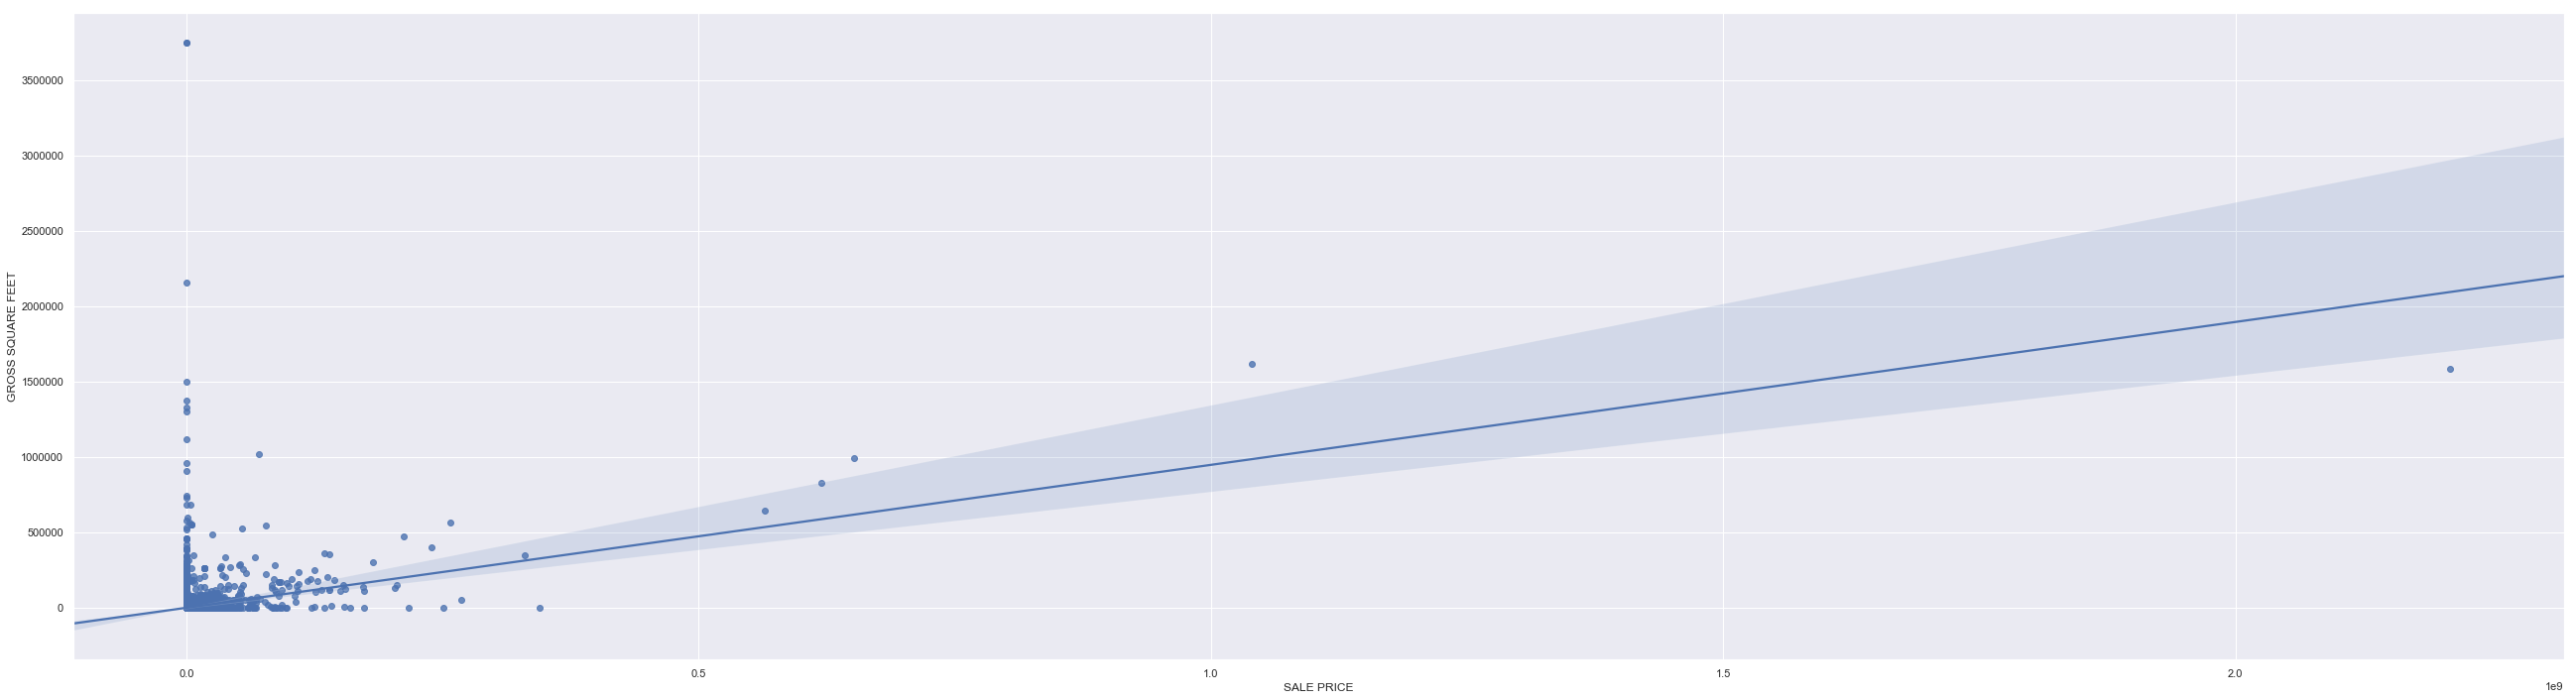

In [43]:
sns.regplot(x="SALE PRICE", y="GROSS SQUARE FEET", data=data)

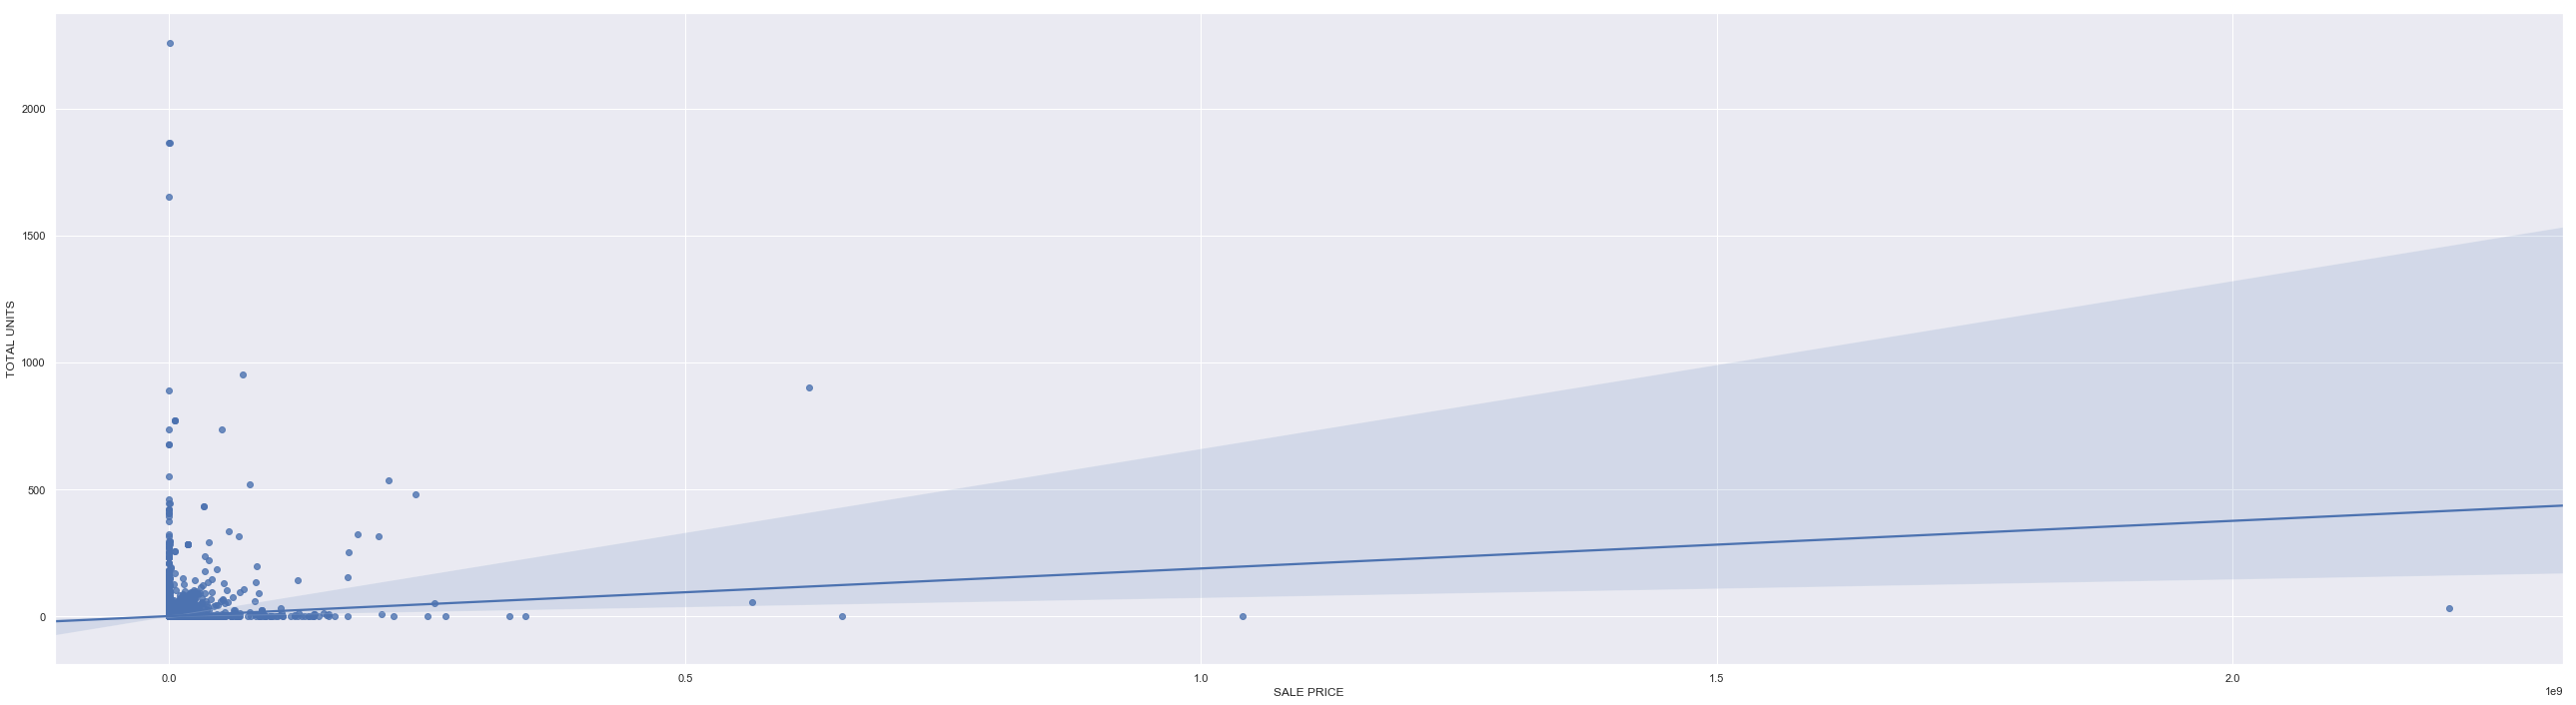

In [44]:
sns.regplot(x="SALE PRICE", y="TOTAL UNITS", data=data)

In [45]:
# identifying both the graphs we could clearly see that there is very less  linear relation between salesprice and other attributes so we are getting very less accuracy using linear regerssion.

In [46]:
# using KNN to predict the neighbourhood.
data1=pd.read_csv('nyc-rolling-sales (1).csv')
# data1= data1.replace(r'\s+', 0, regex=True)
data1=data1.fillna(0)

data1.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


In [47]:
neighbour=data1.pop('NEIGHBORHOOD')

In [48]:
data2=data1[['TOTAL UNITS','RESIDENTIAL UNITS','BLOCK',]]
data2

,TOTAL UNITS,RESIDENTIAL UNITS,BLOCK
0,5,5,392
1,31,28,399
2,17,16,399
3,10,10,402
4,6,6,404
5,20,20,405
6,8,8,406
7,46,44,407
8,15,15,379
9,24,24,387


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data2, neighbour, test_size=0.33, random_state=45)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_array = []
k_array = []
for k in range(3,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The

[0.753816780032177, 0.7419261076331135, 0.7271372426246925, 0.7164451452592691, 0.7069921925183755, 0.6956863505318825, 0.686228639972228, 0.6792008131650776, 0.6729799892189848, 0.664100755006759, 0.6576185494625791, 0.6513866614378105, 0.6471221854939588, 0.6425511773838801, 0.6373652188087405, 0.6336404460668055, 0.6278178330110069, 0.6237980817722967, 0.6201733657778186, 0.6171327044113966, 0.6140520599418504, 0.6119198890766193, 0.6100324968937162, 0.6074780641858772]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


[0.24618322 0.25807389 0.27286276 0.28355485 0.29300781 0.30431365
 0.31377136 0.32079919 0.32702001 0.33589924 0.34238145 0.34861334
 0.35287781 0.35744882 0.36263478 0.36635955 0.37218217 0.37620192
 0.37982663 0.3828673  0.38594794 0.38808011 0.3899675  0.39252194]


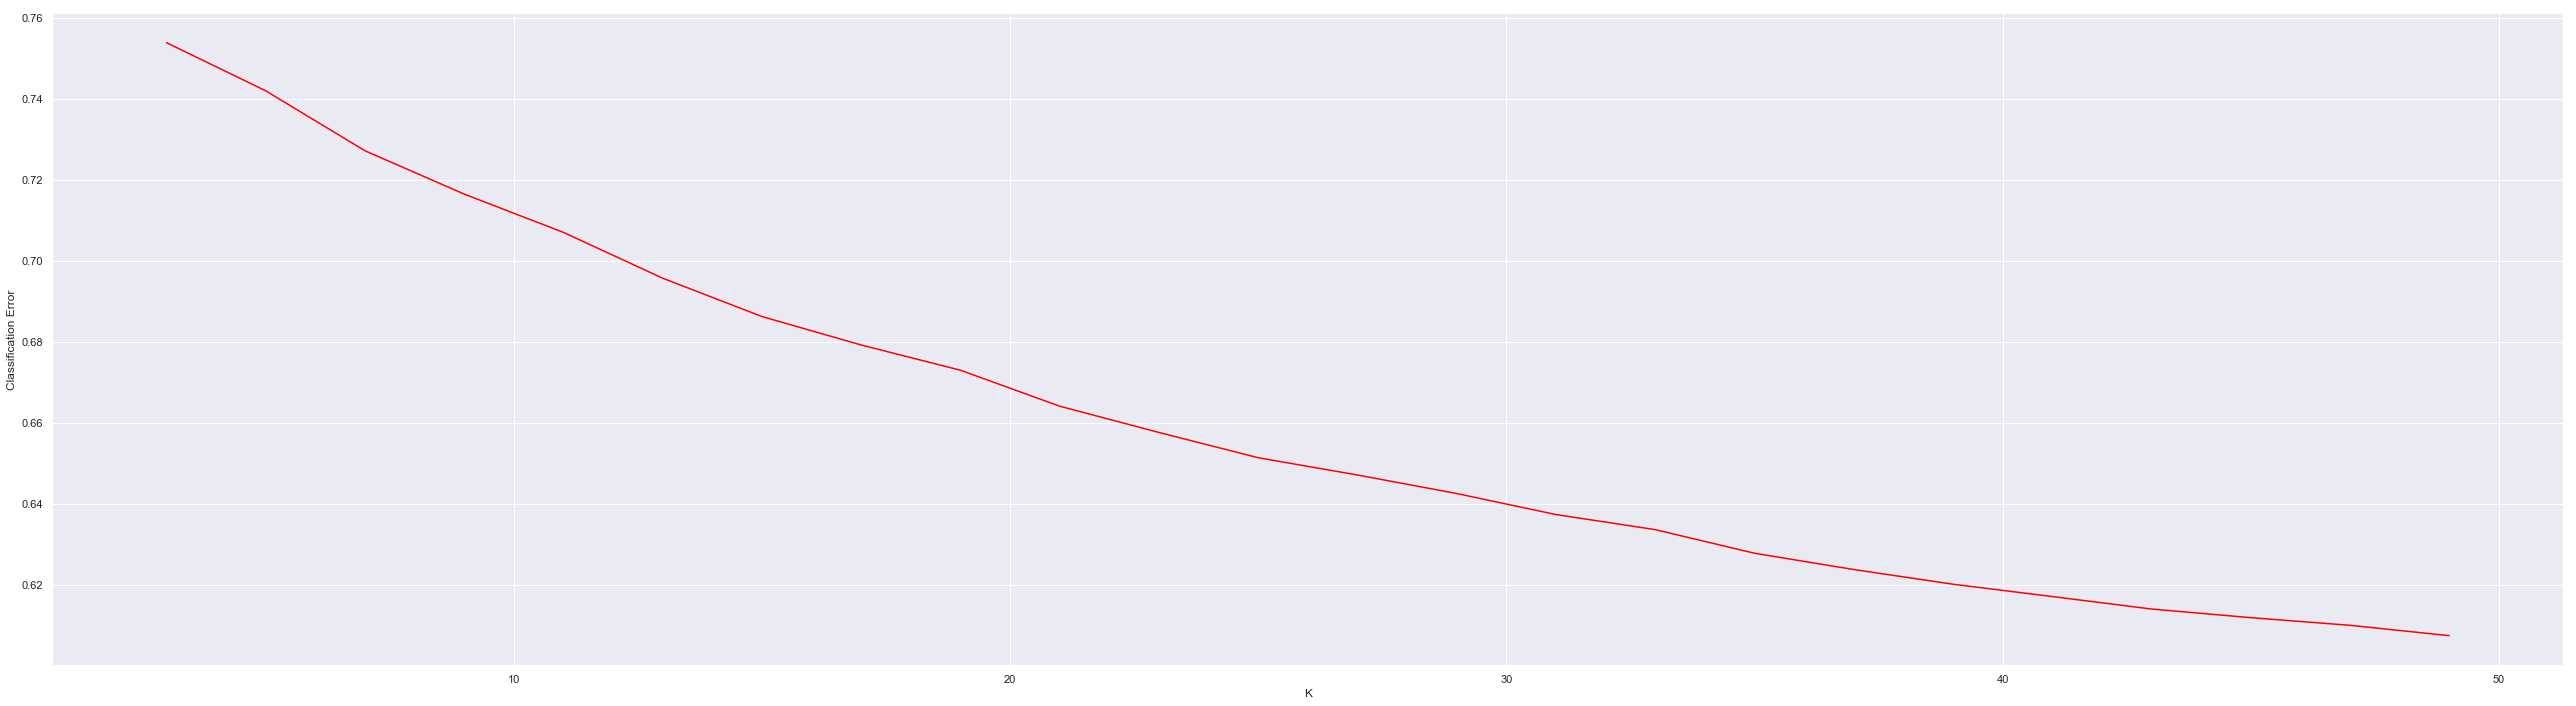

In [51]:
class_error = 1.0 - np.array(accuracy_array)
print(class_error)
plt.plot(k_array, accuracy_array,color='red')
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [56]:
min_ind = np.argmin(class_error)
print(min_ind)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK)

#accuracy is very less and I would like to see if chnaging features increase the accuracy.

0
Optimal value of K is 3 


In [57]:
#predicting few neighbours
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=49, p=2,
           weights='uniform')

In [58]:
predvalues=knn.predict(X_test)

print("First 10 values of the predicted neighbours")
predvalues[:10]

First 10 values of the predicted neighbours


array(['ASTORIA', 'MURRAY HILL', 'GLENDALE', 'UPPER EAST SIDE (79-96)',
       'SOHO', 'FLUSHING-SOUTH', 'KIPS BAY', 'WILLIAMSBURG-NORTH',
       'FLATIRON', 'EAST NEW YORK'], dtype=object)

In [60]:
data3=pd.read_csv('nyc-rolling-sales.csv')
data3.head()
data3.fillna(0)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE0MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,5,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,0,12/14/16 0:00
2,6,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,0,1200902016 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,8,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00
5,9,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,0,7/20/17 0:00
6,10,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/16 0:00
7,11,1,ALPHABET CITY,07 RENTALS 0 WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,0,7/20/17 0:00
8,12,1,ALPHABET CITY,08 RENTALS 0 ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,0,6/20/17 0:00
9,13,1,ALPHABET CITY,08 RENTALS 0 ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,1100702016 00:00:00


In [61]:
neighbour=data3.pop('NEIGHBORHOOD')

In [62]:
data4=data3[['LOT','RESIDENTIAL UNITS','TOTAL UNITS' ]]

In [63]:
data4

,LOT,RESIDENTIAL UNITS,TOTAL UNITS
0,6,5,5
1,26,28,31
2,39,16,17
3,21,10,10
4,55,6,6
5,16,20,20
6,32,8,8
7,18,44,46
8,34,15,15
9,153,24,24


In [64]:
X_train, X_test, y_train, y_test = train_test_split(data4, neighbour, test_size=0.2, random_state=45)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_array = []
k_array = []
for k in range(3,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The

[0.058041278352405204, 0.06158784970382399, 0.06333832221331367, 0.0675552527359485, 0.06933036277167771, 0.07029298810293261, 0.0704335605772832, 0.07142283461464385, 0.07154568732780894, 0.07143230989745765, 0.0720760136797784, 0.07296248284631575, 0.07291052779833426, 0.07412652359091945, 0.07417523380366062, 0.074521269380392, 0.0747656082590368, 0.07432528465143218, 0.07493494413089538, 0.07463893866319789, 0.0751326531119342, 0.07502201710319373, 0.07545302783015681, 0.07560683076030973]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


[0.94195872 0.93841215 0.93666168 0.93244475 0.93066964 0.92970701
 0.92956644 0.92857717 0.92845431 0.92856769 0.92792399 0.92703752
 0.92708947 0.92587348 0.92582477 0.92547873 0.92523439 0.92567472
 0.92506506 0.92536106 0.92486735 0.92497798 0.92454697 0.92439317]


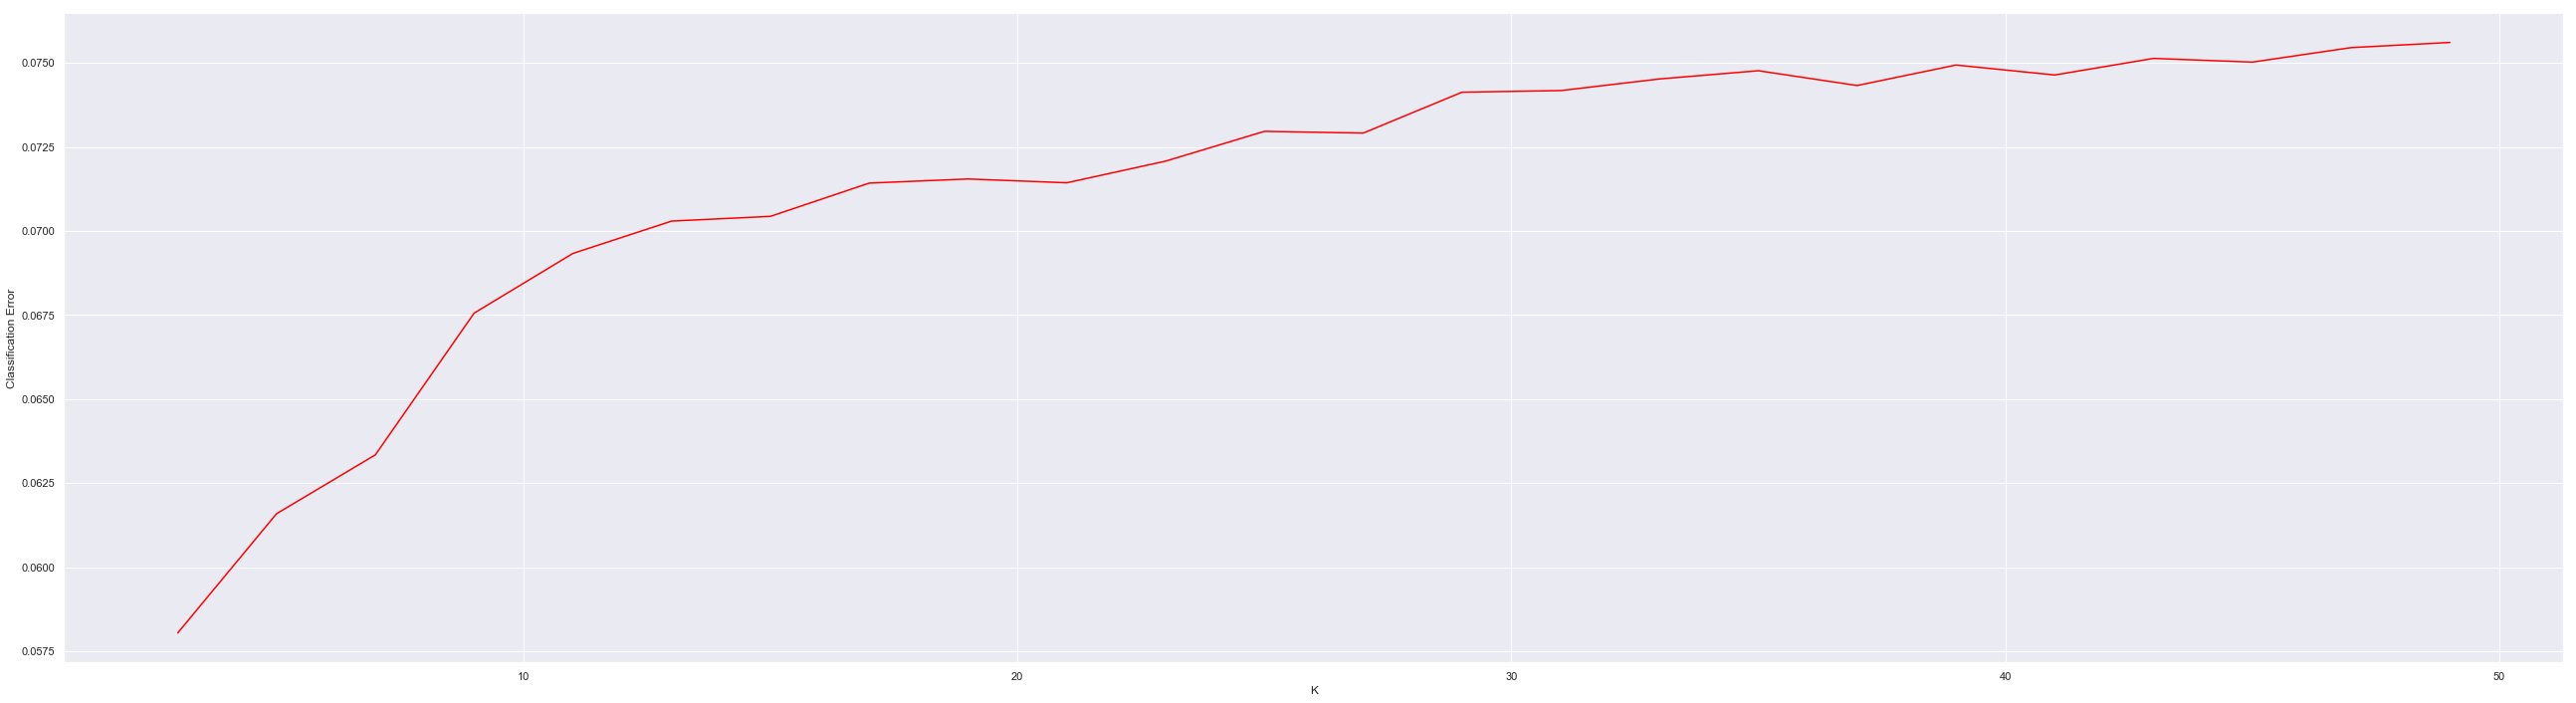

In [66]:
class_error = 1.0 - np.array(accuracy_array)
print(class_error)
plt.plot(k_array, accuracy_array,color='red')
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [67]:
min_ind = np.argmin(class_error)
print(min_ind)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK) # accuracy improved by chnaging the features and splitting the training and test data in 80 and 20 ratio. We are giving more training data so the algorithm gets trained well and give good predictions is my assumption here.

23
Optimal value of K is 49 


### Exercise 3: Use financial data from Yahoo web site. 

<ul>
<li>Get the Data: Use Pandas datareader to download daily data for a "AAPL" stock that has at least eight years of data, making sure it goes from earlier to later. 
<li> Create the time series of daily log returns of the stock price. Note that log return at time $t$ is defined as $\log {S_t/S_{t-1}}$, where $S_t$ is price of asset at time $t$ and $S_{t-1}$ is price of asset at time $t-1$. Do the same for volume data (i.e., create the time series of daily log changes in volume).
<li> Next, set up a linear regression model that uses the past two returns to predict the next return. Run it and see if you can make any money with it. Try it for both stock returns and volumes. 
</ul>

In [4]:
import pandas_datareader.data as web
import pandas as pd
import datetime
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2019, 1, 1)
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [5]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,31.394041
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,31.557884
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,31.816027
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,31.790306
2011-01-07,48.049999,47.414288,47.712856,48.017143,77982800.0,32.017971


In [6]:
np.shape(aapl)

(2013, 6)

In [9]:
aapl['Log_Ret'] = np.log(aapl['Adj Close'] / aapl['Adj Close'].shift(1))

In [10]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret
Date,,,,,,,
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,31.394041,NaN
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,31.557884,0.005205
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,31.816027,0.008147
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,31.790306,-0.000809
2011-01-07,48.049999,47.414288,47.712856,48.017143,77982800.0,32.017971,0.007136


In [11]:
aapl['Log_volume']=np.log(aapl['Volume'] / aapl['Volume'].shift(1))

In [12]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Log_volume
Date,,,,,,,,
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,31.394041,NaN,NaN
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,31.557884,0.005205,-0.364783
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,31.816027,0.008147,-0.190304
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,31.790306,-0.000809,0.161912
2011-01-07,48.049999,47.414288,47.712856,48.017143,77982800.0,32.017971,0.007136,0.037572


In [135]:
aapl.fillna(method='bfill')

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Log_volume
Date,,,,,,,,
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,31.394041,0.005205,-0.364783
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,31.557884,0.005205,-0.364783
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,31.816027,0.008147,-0.190304
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,31.790306,-0.000809,0.161912
2011-01-07,48.049999,47.414288,47.712856,48.017143,77982800.0,32.017971,0.007136,0.037572
2011-01-10,49.032856,48.167141,48.404285,48.921429,112140000.0,32.620960,0.018657,0.363260
2011-01-11,49.279999,48.495716,49.268570,48.805714,111027000.0,32.543804,-0.002368,-0.009975
2011-01-12,49.204285,48.857143,49.035713,49.202858,75647600.0,32.808609,0.008104,-0.383688
2011-01-13,49.520000,49.121429,49.308571,49.382858,74195100.0,32.928646,0.003652,-0.019388


In [13]:
#adding previous two days returns as well
aapl['Log_Ret_y1']=np.log(aapl['Adj Close'] / aapl['Adj Close'].shift(2))
aapl['Log_Ret_y2']=np.log(aapl['Adj Close'] / aapl['Adj Close'].shift(3))
aapl['Log_volume_y1']=np.log(aapl['Volume'] / aapl['Volume'].shift(3))
aapl['Log_volume_y2']=np.log(aapl['Volume'] / aapl['Volume'].shift(3))
aapl.fillna(method='bfill')

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Log_volume,Log_Ret_y1,Log_Ret_y2,Log_volume_y1,Log_volume_y2
Date,,,,,,,,,,,,
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,31.394041,0.005205,-0.364783,0.013352,0.012543,-0.393174,-0.393174
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,31.557884,0.005205,-0.364783,0.013352,0.012543,-0.393174,-0.393174
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,31.816027,0.008147,-0.190304,0.013352,0.012543,-0.393174,-0.393174
2011-01-06,47.892857,47.557144,47.817142,47.675713,75107200.0,31.790306,-0.000809,0.161912,0.007338,0.012543,-0.393174,-0.393174
2011-01-07,48.049999,47.414288,47.712856,48.017143,77982800.0,32.017971,0.007136,0.037572,0.006327,0.014474,0.009180,0.009180
2011-01-10,49.032856,48.167141,48.404285,48.921429,112140000.0,32.620960,0.018658,0.363260,0.025794,0.024985,0.562743,0.562743
2011-01-11,49.279999,48.495716,49.268570,48.805714,111027000.0,32.543804,-0.002368,-0.009975,0.016290,0.023426,0.390857,0.390857
2011-01-12,49.204285,48.857143,49.035713,49.202858,75647600.0,32.808609,0.008104,-0.383688,0.005736,0.024394,-0.030403,-0.030403
2011-01-13,49.520000,49.121429,49.308571,49.382858,74195100.0,32.928646,0.003652,-0.019388,0.011756,0.009388,-0.413050,-0.413050


In [14]:
X_aapl = aapl[['Log_volume_y1','Log_volume_y2']]

In [15]:
X_aapl=X_aapl.fillna(method='bfill')

In [16]:
Y_aapl=aapl['Log_volume']

In [17]:
Y_aapl=Y_aapl.fillna(method='bfill')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_aapl, Y_aapl, test_size=0.20, random_state=45)
reg = linear_model.LinearRegression()
reg = reg.fit(X_train, y_train)
pred = reg.predict(X_test)
r=reg.score(X_test,y_test)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, pred)
r
pred[:5]

array([ 0.00746552, -0.11040923,  0.27160913,  0.12994976,  0.11000565])

In [20]:
mse

    

0.09011633095572628

In [21]:
X_aapl_close = aapl[['Log_Ret_y1','Log_Ret_y2']]

In [22]:
X_aapl_close1=X_aapl_close.fillna(method='bfill')

In [23]:
Y_appl_Close=aapl['Log_Ret']

In [24]:
Y_appl_Close1=Y_appl_Close.fillna(method='bfill')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_aapl_close1, Y_appl_Close1, test_size=0.20, random_state=45)
reg2 = linear_model.LinearRegression()
reg2 = reg.fit(X_train, y_train)
pred = reg2.predict(X_test)
r=reg2.score(X_test,y_test)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, pred)
r

0.5577846147165919

In [26]:
mse

0.00014525726719347346

Text(0.5, 1.0, 'Log Returns')

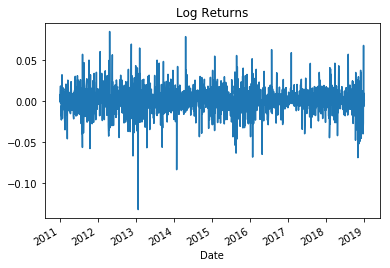

In [33]:
aapl['Log_Ret'].plot()
plt.title('Log Returns')

Text(0.5, 1.0, 'Log volume Retuns')

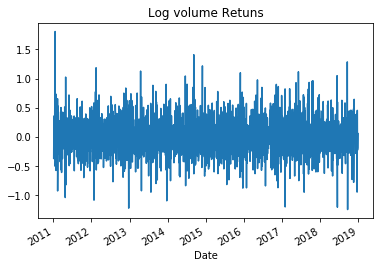

In [32]:
aapl['Log_volume'].plot()
plt.title('Log volume Retuns')

In [85]:
#comparing both models model with log volumes is giving better results seeing the MSE values so we can go with log volumes method. MSE with bigger values is an indication of bad model.
